In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
# Check for missing values
df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

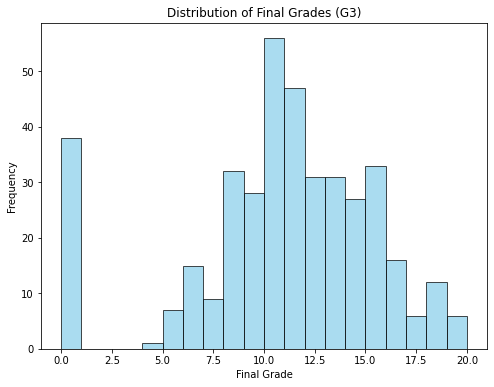

In [4]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable 'G3'
plt.figure(figsize=(8,6))
plt.hist(df['G3'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()


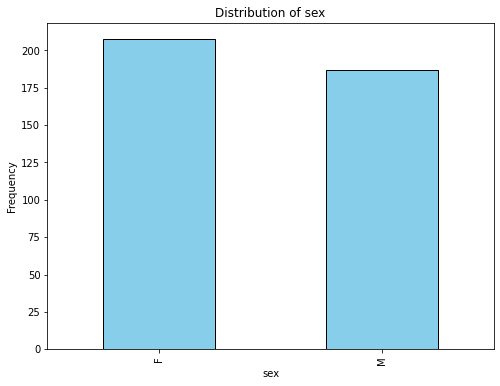

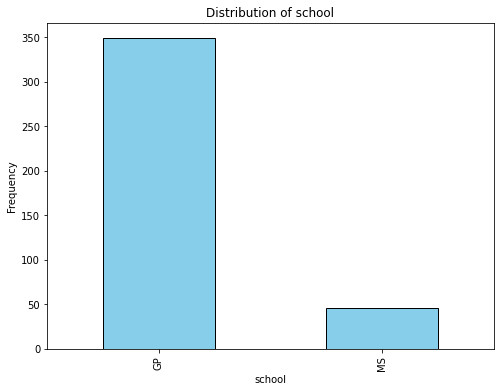

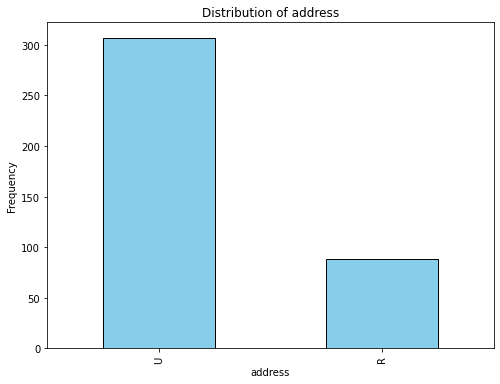

In [5]:
# Define a function to plot categorical variables
def plot_categorical(df, column):
    plt.figure(figsize=(8,6))
    df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot categorical variables
for column in ['sex', 'school', 'address']:
    plot_categorical(df, column)


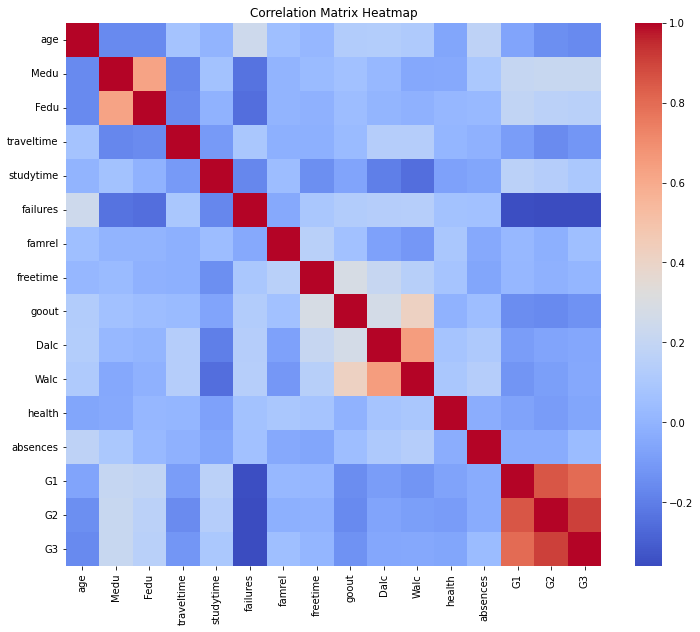

In [6]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Draw the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of binary categorical features to apply LabelEncoder
binary_features = ['sex', 'school', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Apply LabelEncoder to binary features
for feature in binary_features:
    df[feature] = le.fit_transform(df[feature])

# List of multi-category features to apply one-hot encoding
multi_cat_features = ['Mjob', 'Fjob', 'reason', 'guardian']

# Apply one-hot encoding to multi-category features
df = pd.get_dummies(df, columns=multi_cat_features, drop_first=True)

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of numeric features to scale
num_features = ['age', 'absences', 'G1', 'G2', 'G3']

# Apply StandardScaler to numeric features
df[num_features] = scaler.fit_transform(df[num_features])

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,1.023046,1,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0.238380,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,-1.330954,1,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,-1.330954,1,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,-0.546287,1,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0


# Insights 
No missing values: The dataset is quite clean and does not contain any missing values, eliminating the need for imputation or removal of incomplete records.

Distribution of Final Grades: The distribution of the target variable, G3 (final grade), is somewhat normally distributed, with most students scoring between 10 and 15. However, a significant number of students had a score of 0, indicating either a failing grade or missing data.

Categorical Variables: We observed that there are slightly more female students than male students, most students come from the GP school, and the majority live in an urban setting.

Correlations: We found strong positive correlations between the three periods of grades (G1, G2, and G3). We also found a negative correlation between age and G3, and between failures and G3, suggesting that younger students or students with fewer past class failures tend to have higher final grades. Parents' education level (Medu and Fedu) was positively correlated with the final grade, suggesting that higher parental education levels might contribute to better student performance.

Data Preprocessing: We encoded the categorical variables using label encoding and one-hot encoding. We then scaled numerical features such as age, absences, G1, G2, and G3 to ensure they are on the same scale. Finally, we dropped G1 and G2 from the dataset to avoid potential overfitting or multicollinearity issues in subsequent modeling, since they are very strongly correlated with the final grade G3.



In [9]:
# Save the preprocessed dataframe to a new csv file
df.to_csv('data/student-mat-cleaned.csv', index=False)
